In [1]:
import pandas as pd

In [2]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [5]:
df.head()
print(len(df))

3066766


In [6]:
num_columns = df.shape[1]

print(num_columns)

19


In [7]:
pd.to_datetime(df.tpep_dropoff_datetime)
pd.to_datetime(df.tpep_pickup_datetime)

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [8]:
std = (df.duration).std()
print(std)

42.594351241920904


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

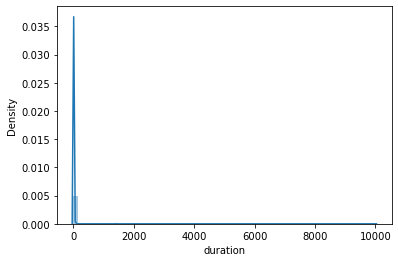

In [9]:
sns.distplot(df.duration)

In [10]:
print(len(df.duration))

3066766


In [11]:
df = df[(df.duration >= 1) & (df.duration <= 60)]
print(len(df.duration))

3009173


In [12]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
dv = DictVectorizer()

train_dicts = df[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

X_train.shape

(3009173, 515)

In [13]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared = False)

7.649261027792376

In [16]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    pd.to_datetime(df.tpep_dropoff_datetime)
    pd.to_datetime(df.tpep_pickup_datetime)
    

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [17]:
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [18]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val[target].values

In [19]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared = False)

7.811832836304415